In [1]:
from QAOAproblems import QAOAmaxcut
import networkx as nx

### Teste Calculate Minimal Paths,  Next Qubits e Swap Paths

Gerando o grafo do exemplo do artigo

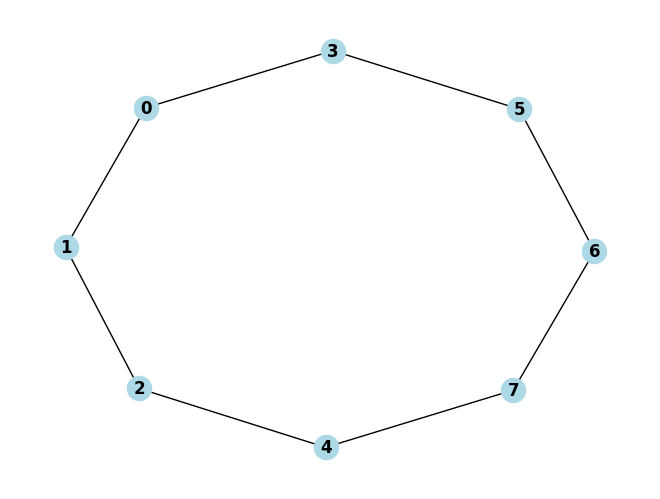

In [2]:
qubitmap_t = [0,1,2,3,4,5,6,7]
QM = nx.Graph()
QM.add_edges_from([(0,1),(1,2), (0,3), (2,4), (3,5), (5,6), (6,7), (4,7)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

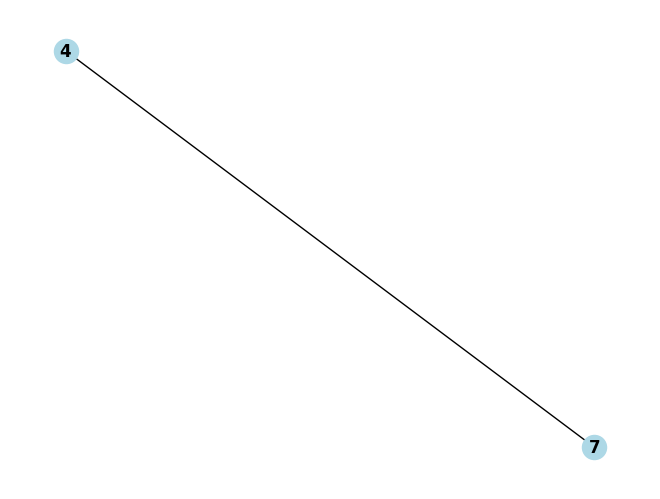

In [3]:
maxcut_graph = nx.Graph()
maxcut_graph.add_edges_from([(4,7)])
nx.draw(maxcut_graph, with_labels=True, node_color='lightblue', font_weight='bold')

Testando o exemplo do artigo

In [4]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
path1, path2 = max_cut._calculate_minimal_paths(4, 7, 2, 1)
print(path1)
print(path2)

[4, 2]
[7, 4, 2, 1]


Ele gera os caminhos conforme o artigo, temos que checar agora se faz o swap

In [5]:
path1s, path2s = max_cut._calculate_minimal_paths(2, 4, 2, 1)
print(path1s)
print(path2s)

[2]
[4, 2, 1]


In [6]:
max_cut._swap_paths(path1s, path2s, 2)

([2, 1], [4, 2])

Troca os caminhos corretamente. Vamos testar next_qubits, ele deve retornar qual dos qubits atuais vai ser o q e o próximo elemento q1

In [7]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
print(max_cut._next_qubits(path1, path2, 4,7))
print(max_cut._next_qubits(path2, path1, 7,4))

(4, 2)
(4, 2)


### Teste Decoding

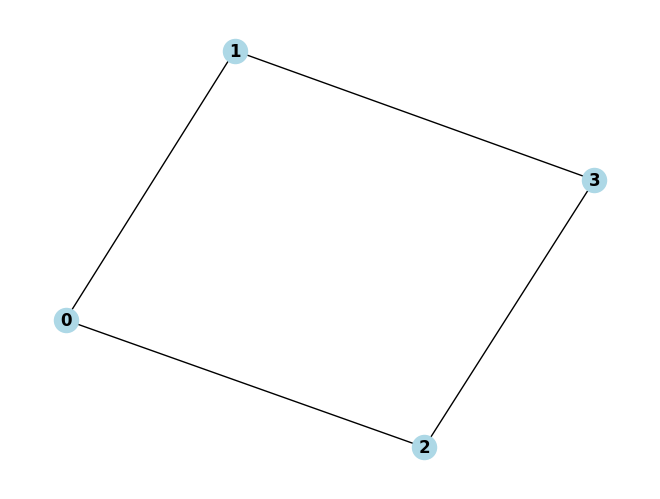

In [8]:
QM = nx.Graph()
QM.add_edges_from([(0,1),(0,2), (1,3), (2,3)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

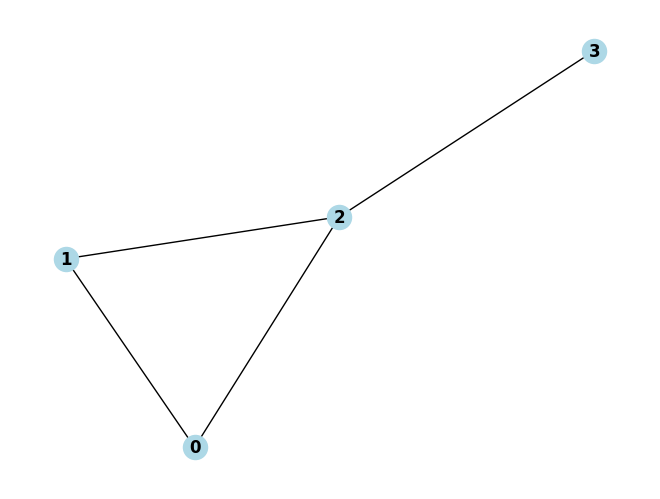

In [9]:
maxcut_graph = nx.Graph()
maxcut_graph.add_edges_from([(0,1),(0,2), (1,2), (2,3)])
nx.draw(maxcut_graph, with_labels=True, node_color='lightblue', font_weight='bold')

In [10]:
max_cut = QAOAmaxcut(graph=maxcut_graph, hardware_graph=QM)
ch1 = [(3,2), (0,2), (0,1), (1,2)]
ch2 = [(2,3), (0,2), (0,1), (2,3)]
qubitmap, node_times = max_cut.decoding(ch1=ch1, ch2=ch2)

['0', '0', '0', '0']
['0', '0', 'ps', 'mix']
['ps', '0', 'ps', 'mix']
['mix', 'ps', 'ps', 'mix']
['mix', 'swap', 'ps', 'swap']
['mix', 'mix', 'mix', 'swap']


In [11]:
node_times

array([10., 15., 15., 11.])

Podemos comparar com o resultado do artigo, em que temos os tempos de 11, 16, 16 e 12

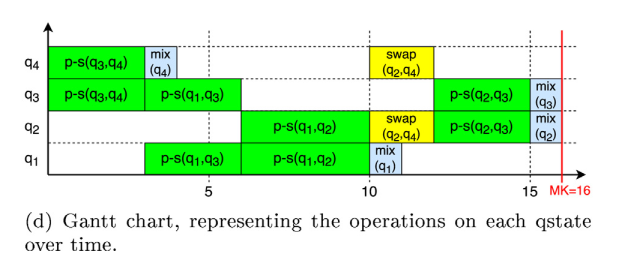

Considerando o artigos, os tempos são 10, 16, 16, 12. Como todos os p-s pesam 3, fica 15

Testar a otimização, tem que criar um caso de teste simples

In [12]:
node_times = [11, 8, 9, 6]
last_gates = ['mix', 'swap', 'ps', 'ps']
max_cut._change_mix_swap(0, 1, node_times, last_gates)


True

Agora, testando para quando t_1 for igual ou apenas T_mix menor que t_0

In [13]:
node_times = [11, 11, 9, 6]
last_gates = ['mix', 'swap', 'ps', 'ps']
max_cut._change_mix_swap(0, 1, node_times, last_gates)

False

In [14]:
node_times = [11, 10, 9, 6]
last_gates = ['mix', 'swap', 'ps', 'ps']
max_cut._change_mix_swap(0, 1, node_times, last_gates)

False